<a href="https://colab.research.google.com/github/kylemccullough1/MachineLearning/blob/main/Assignment_3_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Splitting of data into train, test, and validation set. Code gotten for Mnist online. https://www.tensorflow.org/datasets/keras_example
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
# Class set up to make it easy to test different hyperparameters
class Cnn:
  def __init__(self, filter, lr, optimizer, batch_size):
    self.filter = filter
    self.lr = lr
    self.optimizer = optimizer
    self.batch_size = batch_size

  def run(self):
    if(self.filter == 'Regular'):
      cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),
      
      tf.keras.layers.Conv2D(filters=160, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
      ])
    elif(self.filter == 'Reversed'):
      cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=160, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      
      tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),
      
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
      ])
    elif(self.filter == 'Hourglass'):
      cnn = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),
      
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((1, 1)),

      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
      ])
    if(self.optimizer == 'Adam'):
      cnn.compile(
          optimizer=tf.keras.optimizers.Adam(self.lr),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )
      history = cnn.fit(
          ds_train,
          epochs=10,
          verbose=0,
          batch_size=self.batch_size,
          validation_data=ds_test,
      )
      plt.plot(history.history['sparse_categorical_accuracy'])
      plt.plot(history.history['val_sparse_categorical_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('Adam accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('Adam model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()
    elif(self.optimizer == 'SGD'):
      cnn.compile(
          optimizer=tf.keras.optimizers.SGD(self.lr),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )

      history = cnn.fit(
          ds_train,
          epochs=10,
          verbose=0,
          batch_size=self.batch_size,
          validation_data=ds_test,
      )

      plt.plot(history.history['sparse_categorical_accuracy'])
      plt.plot(history.history['val_sparse_categorical_accuracy'])
      plt.title('SGD model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('SGD model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()
    elif(self.optimizer == 'RMSProp'):
      cnn.compile(
          optimizer=tf.keras.optimizers.RMSprop(self.lr),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
          metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
      )

      history = cnn.fit(
          ds_train,
          epochs=10,
          verbose=0,
          batch_size=self.batch_size,
          validation_data=ds_test,
      )

      plt.plot(history.history['sparse_categorical_accuracy'])
      plt.plot(history.history['val_sparse_categorical_accuracy'])
      plt.title('RMSprop model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('RMSprop model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()
  

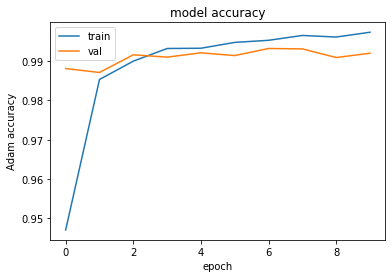

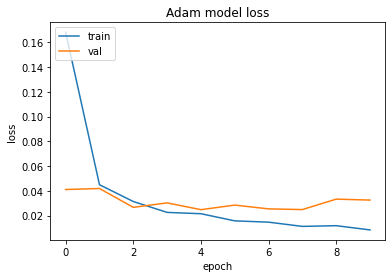

In [10]:
# Small to large filter using Adam and optimum hyperparameters
regular = Cnn('Regular', .001, 'Adam', 32)
regular.run()

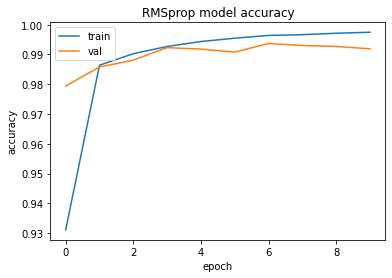

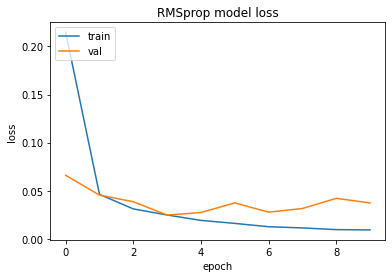

In [ ]:
# Small to large filter using RMSprop and optimum hyperparameters
regular = Cnn('Regular', .001, 'RMSProp', 32)
regular.run()

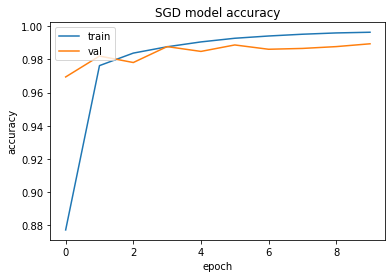

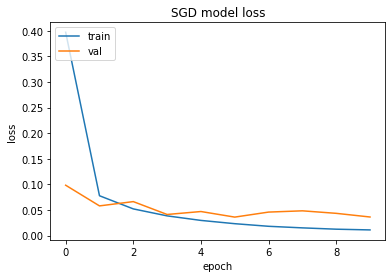

In [ ]:
# Small to large filter using SGD and optimum hyperparameters
regular = Cnn('Regular', .1, 'SGD', 25)
regular.run()

For the regular CNN, I landed on the best set of hyperparameters to be optimizer: Adam, learning rate: .001, and batch size: 32. For testing this CNN, I went through the three optimizers, .1-.0001 for learning rate, and 25-32 for batch size. All of them performed to a pretty high accuracy, but Adam had the best overall performance. The final accuracies were Adam: 0.9932, RMSprop: .9906, SGD: .9891. I believe Adam performed the best because of the lower amount of epochs, and Adam being able to converge fastest.

In [ ]:
# Large to small filter using Adam and optimum hyperparameters
reversed = Cnn('Reversed', .001, 'Adam', 25)
reversed.run()

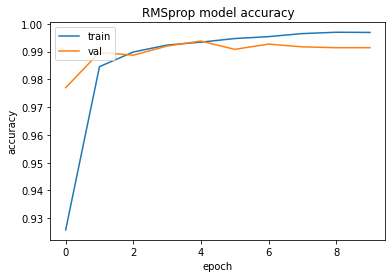

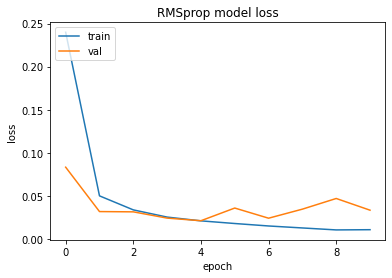

In [ ]:
# Large to small filter using RMSprop and optimum hyperparameters
reversed = Cnn('Reversed', .001, 'RMSProp', 32)
reversed.run()

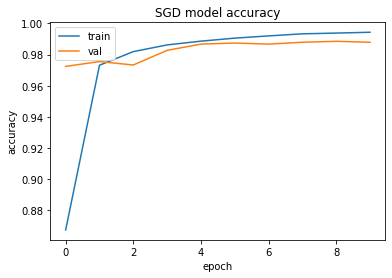

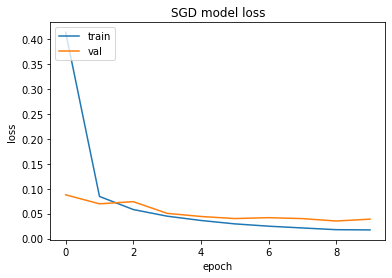

In [ ]:
# Large to small filter using SGD and optimum hyperparameters
reversed = Cnn('Reversed', .1, 'SGD', 32)
reversed.run()

For the reversed CNN, I landed on the best set of hyperparameters to be optimizer: RMSprop, learning rate: .001, and batch size: 32. For testing this CNN, I went through the three optimizers, .1-.0001 for learning rate, and 25-32 for batch size. All of them performed to a pretty high accuracy, but RMSprop had the best overall performance. The final accuracies were Adam: 0.9925, RMSprop: .9932, SGD: .9859. RMSprop performed best, but Adam still had the best loss on the validation set.

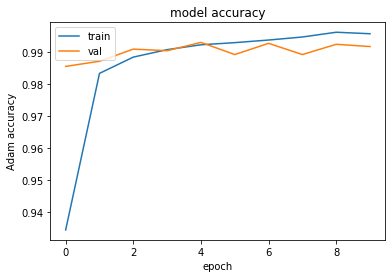

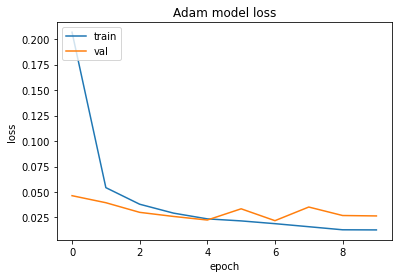

In [ ]:
# Hourglass filter shape using Adam and optimum hyperparameters
hourglass = Cnn('Hourglass', .001, 'Adam', 32)
hourglass.run()

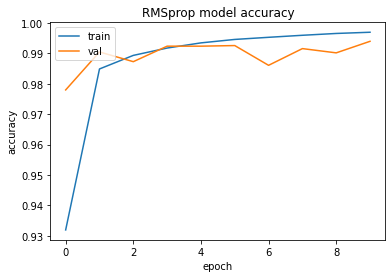

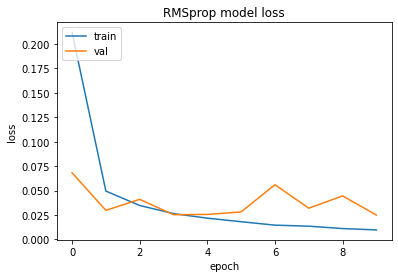

In [ ]:
# Hourglass filter shape using RMSprop and optimum hyperparameters
hourglass = Cnn('Hourglass', .001, 'RMSProp', 32)
hourglass.run()

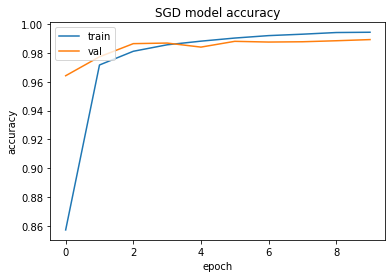

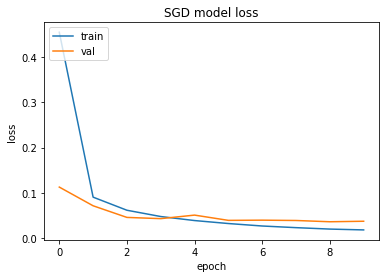

In [ ]:
# Hourglass filter shape using SGD and optimum hyperparameters
hourglass = Cnn('Hourglass', .1, 'SGD', 20)
hourglass.run()

For the hourglass CNN, I landed on the best set of hyperparameters to be optimizer: RMSprop, learning rate: .001, and batch size: 32. For testing this CNN, I went through the three optimizers, .1-.0001 for learning rate, and 25-32 for batch size. All of them performed to a pretty high accuracy, but RMSprop had the best overall performance. The final accuracies were Adam: .9922, RMSprop: .9931, SGD: .9870. 

